# FFT: Fast Fourier Transform

## Bibliotecas Básicas

In [1]:
from math import log2
import numpy as np
import matplotlib.pyplot as plt
from ipykernel import kernelapp as app
%matplotlib inline

## Implementação da FFT

In [2]:
def FFT(P, n):
    if n == 1:
        return P
    
    Pe, Po = P[::2], P[1::2]
    ye = FFT(Pe, len(Pe))
    yo = FFT(Po, len(Po))
    
    w = np.exp((2 * np.pi * 1j) / n)
    
    y = np.array([0]*n, dtype = 'complex_')
    for i in range(n//2):
        y[i] = ye[i] + w**i * yo[i]
        y[i + n//2] = ye[i] - w**i * yo[i]
    return y

def IFFT(P, n):
    if n == 1:
        return P
    
    Pe, Po = P[::2], P[1::2]
    ye = IFFT(Pe, len(Pe))
    yo = IFFT(Po, len(Po))
    
    w = np.exp((2 * np.pi * 1j) / n)
    w = 1/(w*n)
    
    y = np.array([0]*n, dtype = 'complex_')
    for i in range(n//2):
        y[i] = ye[i] + w**i * yo[i]
        y[i + n//2] = ye[i] - w**i * yo[i]
    return y

In [3]:
A = np.array([1,2,3,4,5,6])
print("A =", A)
myres = FFT(A, len(A))
res = np.fft.fft(A)

for i in range(len(A)):
    print(i, myres[i], res[i])
          
print(IFFT(myres, len(myres)))

A = [1 2 3 4 5 6]
0 (21+0j) (21+0j)
1 (5+3.4641016151377544j) (-3+5.196152422706632j)
2 0j (-3+1.7320508075688772j)
3 (-3+0j) (-3-4.440892098500626e-16j)
4 (0.9999999999999996-3.4641016151377544j) (-3-1.7320508075688772j)
5 0j (-3-5.196152422706632j)
[24.        +0.j         23.16666667-4.33012702j  0.        +0.j
 20.        -6.92820323j 20.83333333-2.59807621j  0.        +0.j        ]


## Aplicação da FFT: Multiplicação de Polinômios 

In [4]:
def poly_multiplication(A, B):
    szA = len(A)
    szB = len(B)
    
    sz = 1<<(int(log2(szA + szB - 1)) + 1)
    
    A = np.concatenate((A, np.array([0]*(sz - szA), dtype = 'complex_')))
    B = np.concatenate((B, np.array([0]*(sz - szB), dtype = 'complex_')))

    C = np.fft.ifft( np.fft.fft(A) * np.fft.fft(B) )
    
    return C

In [5]:
A = np.array([1,2,3,4,5,6])
B = np.array([1,2,3,4,5,6,7,8])
C = poly_multiplication(A, B)

C = np.array(list(map(int, np.abs(np.round(C)))))
print(C)

[  1   4  10  20  35  56  77  98 110 112 103  82  48   0   0   0]


## Aplicação da FFT: Processamento de Sinais 

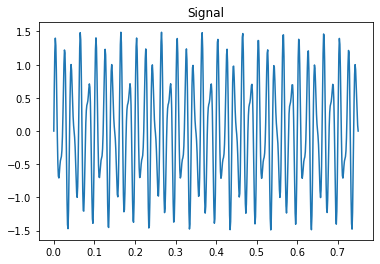

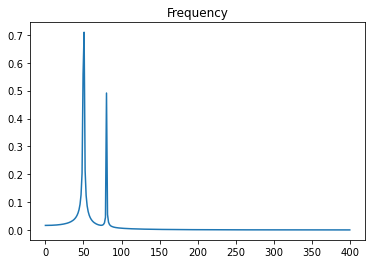

In [6]:
# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

# FFT
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

# Plot figure

plt.figure()
plt.title('Signal')
plt.plot(x, y)

plt.figure()
plt.title('Frequency')
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))

plt.show()